In [1]:
!pip install CFEDemands --upgrade
!pip install xarray

Requirement already up-to-date: CFEDemands in /Users/sannidhi/anaconda3/lib/python3.7/site-packages (0.1.6.6)
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import cfe
import pandas as pd
import numpy as np
import random
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
pd.options.display.max_columns = None

In [3]:
data_no_food_stamps = pd.read_csv('data/no_food_stamps.csv')
data_yes_food_stamps = pd.read_csv('data/yes_food_stamps.csv')

columns_to_drop = ['Unnamed: 0', 'id', 'id_2', 
                   'supp_security', 'schoolmeals_purchases', 
                   'self_employed', 'FWAGEXM',
                   'members_under18', 'members_over64',
                    'food_away', 'food_home', 'avg(GROSPAYX)']

def standard_format(dataset):
    
    dataset['j'] = dataset['id']
    dataset['t'] = 17
    dataset['m'] = 1
    
    
    dataset['M'] = ""
    dataset['F'] = ""
    dataset.loc[dataset['sex'] == 'Male', 'M'] = 1
    dataset.loc[dataset['M'] == '', 'M'] = 0
    dataset.loc[dataset['sex'] == 'Female', 'F'] = 1
    dataset.loc[dataset['F'] == '', 'F'] = 0
    
    dataset['log_fsize'] = np.log(dataset['fam_size'])
    
    dataset.set_index(['j', 't', 'm'], inplace = True)
    dataset.drop(columns = columns_to_drop, inplace = True)

cali_no = data_no_food_stamps[data_no_food_stamps['state'].str.contains('Cali', na = False)]
cali_yes = data_yes_food_stamps[data_yes_food_stamps['state'].str.contains('Cali', na = False)]

datasets = {'California residents (no FS)': cali_no,
           'California residents (yes FS)': cali_yes,
           'US residents (no FS)': data_no_food_stamps,
           'US residents (yes FS)': data_yes_food_stamps}

for key, value in datasets.items():
    standard_format(value)

### Describing populations 

In [4]:
pop_describers = ['age', 'fam_size', 'net_income', 'total_food', 'total_food_percent', 'number_foodstamps']

In [5]:
cali_no[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,485.000000,485.00000,485.000000,485.000000,485.000000,0.0
mean,51.476289,2.56701,94651.287629,168.057934,0.149956,NaN


In [6]:
cali_yes[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,39.000000,39.000000,39.000000,39.00000,39.000000,38.0
mean,45.564103,3.589744,41576.887179,128.57101,0.198993,10.0


In [7]:
data_no_food_stamps[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,4884.000000,4884.00000,4884.000000,4884.000000,4884.000000,0.0
mean,52.480344,2.42199,87416.968591,149.098386,0.135048,NaN


In [8]:
data_yes_food_stamps[pop_describers].describe()[:2]

,age,fam_size,net_income,total_food,total_food_percent,number_foodstamps
count,491.000000,491.000000,491.000000,491.000000,491.000000,484.00
mean,48.790224,3.167006,33749.366395,107.321433,0.230127,10.25


### cols

In [9]:
cali_no.columns

Index(['age', 'highest_education', 'profession', 'hispanic',
       'weekly_hours_worked', 'in_college', 'is_married', 'sex',
       'reason_unemployment', 'main_profession', 'numweeks_schoolmeals', 'psu',
       'psu_popsize', 'net_income', 'alcbev', 'bakery', 'beef', 'cereal',
       'child_age', 'housing_type', 'census_division', 'eggs', 'fam_size',
       'total_food', 'fresh_fruit', 'fresh_veg', 'value_foodstamps',
       'number_foodstamps', 'non_alc_grocery', 'milk', 'number_earners',
       'non_alc_bevs', 'oils', 'othdairy', 'othmeat', 'pet_food', 'pork',
       'procfruit', 'proc_veg', 'spouse_race', 'foodstamp_or_not', 'seafood',
       'smoking', 'lives_in_MSA', 'state', 'sweets', 'vehicle',
       'miscellaneous', 'poultry', 'total_food_percent', 'M', 'F',
       'log_fsize'],
      dtype='object')

In [10]:
expenditures = ['alcbev', 'bakery', 'beef', 'cereal', 'eggs',
                'fresh_fruit', 'fresh_veg', 'milk', 'non_alc_bevs',
                'oils', 'othdairy', 'othmeat', 'poultry', 'pork', 'procfruit',
                'proc_veg', 'seafood', 'sweets']

household_chars = ['age', 'M', 'log_fsize', 'vehicle', 'child_age']

## Data viz

,mean,ratio
alcbev,15.778444,0.173792
bakery,7.753568,0.085402
beef,5.419872,0.059697
cereal,3.725519,0.041035
eggs,1.406550,0.015492
fresh_fruit,7.978605,0.087880
fresh_veg,7.051676,0.077671
milk,3.200180,0.035248
non_alc_bevs,8.133430,0.089586
oils,2.293581,0.025263


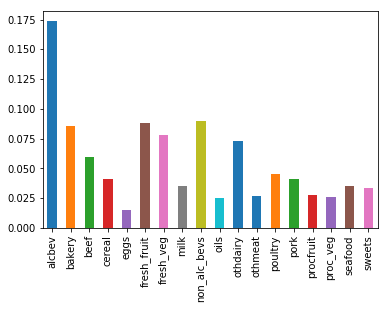

In [11]:
means_no = cali_no[expenditures].describe()
means_no = means_no.loc['mean'].to_frame()
means_no['ratio'] = means_no['mean']/sum(means_no['mean'])
means_no['ratio'].plot.bar()

means_no

,mean,ratio
alcbev,4.842387,0.056493
bakery,7.906218,0.092236
beef,5.851106,0.068261
cereal,4.092479,0.047744
eggs,1.075230,0.012544
fresh_fruit,8.107099,0.094580
fresh_veg,6.532807,0.076214
milk,3.284924,0.038323
non_alc_bevs,9.937705,0.115936
oils,2.429568,0.028344


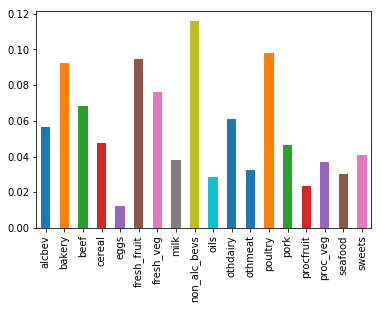

In [12]:
means_yes = cali_yes[expenditures].describe()
means_yes = means_yes.loc['mean'].to_frame()
means_yes['ratio'] = means_yes['mean']/sum(means_yes['mean'])
means_yes['ratio'].plot.bar()
means_yes

## Estimating demand

In [411]:
X_no = cali_no[expenditures]
Z_no = cali_no[household_chars]
Y_no = np.log(X_no.replace(0,np.nan))


Z_no.head()

,,,age,M,log_fsize,vehicle,child_age
j,t,m,,,,,
360993,17,1,62,1,0.693147,2.0,0
360998,17,1,45,0,0.693147,2.0,7
361099,17,1,60,0,0.000000,NaN,0
361135,17,1,71,1,1.098612,2.0,7
361153,17,1,66,1,0.000000,1.0,0


In [412]:
Y_no.head()

,,,alcbev,bakery,beef,cereal,eggs,fresh_fruit,fresh_veg,milk,non_alc_bevs,oils,othdairy,othmeat,poultry,pork,procfruit,proc_veg,seafood,sweets
j,t,m,,,,,,,,,,,,,,,,,,
360993,17,1,2.302585,1.518990,1.357236,0.649485,2.082611,3.340739,3.657213,1.702149,4.540045,NaN,0.261575,1.734876,3.178371,2.967659,2.637181,1.901663,NaN,0.331007
360998,17,1,NaN,NaN,0.980204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361099,17,1,NaN,NaN,NaN,0.292670,0.678034,-1.347074,1.332366,-0.010050,0.169743,NaN,1.660131,NaN,1.617406,NaN,NaN,NaN,2.061787,1.078410
361135,17,1,2.716484,-0.010050,NaN,1.702928,0.688135,2.714720,2.802819,2.285236,2.026402,0.612479,3.401473,0.405465,0.914289,NaN,0.332894,0.797764,0.405465,2.557615
361153,17,1,NaN,1.842928,NaN,NaN,NaN,-0.703198,0.395415,0.368109,NaN,NaN,NaN,1.790926,1.249902,NaN,NaN,NaN,NaN,-0.010050


In [414]:
result_no = cfe.Result(y = Y_no, z = Z_no)
result_no.get_reduced_form()
result_no.delta.to_dataframe().unstack('k')
result_no.a.to_dataframe().unstack('i')
result_no.get_beta().to_dataframe()

,beta
i,
alcbev,0.356074
bakery,0.573952
beef,0.278181
cereal,0.490583
eggs,0.344141
fresh_fruit,0.672120
fresh_veg,0.665859
milk,0.396441
non_alc_bevs,0.626615


In [416]:
result_no

<xarray.Result>
Dimensions:           (i: 18, j: 485, k: 5, kp: 5, m: 1, t: 1)
Coordinates:
  * k                 (k) object 'age' 'M' 'log_fsize' 'vehicle' 'child_age'
  * m                 (m) int64 1
  * t                 (t) int64 17
  * j                 (j) int64 360993 360998 361099 ... 383852 383894 383928
  * i                 (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'
  * kp                (kp) <U9 'M' 'age' 'child_age' 'log_fsize' 'vehicle'
Data variables:
    alpha             object None
    beta              (i) float64 0.3561 0.574 0.2782 ... 0.4834 0.3317 0.5386
    delta             (k, i) float64 -0.002177 0.005167 ... -0.05416 -0.02182
    prices            object None
    characteristics   (k, j, t, m) float64 62.0 45.0 60.0 71.0 ... 0.0 0.0 7.0
    loglambdas        (j, t, m) float64 -1.181 3.486 nan ... 1.778 nan 1.462
    a                 (i, t, m) float64 2.731 1.223 1.34 ... 1.131 1.366 0.8688
    yhat              object None
    ce           

In [415]:
test = xr.DataArray(Z_no)
test

<xarray.DataArray (dim_0: 485, dim_1: 5)>
array([[62.      ,  1.      ,  0.693147,  2.      ,  0.      ],
       [45.      ,  0.      ,  0.693147,  2.      ,  7.      ],
       [60.      ,  0.      ,  0.      ,       nan,  0.      ],
       ...,
       [28.      ,  0.      ,  1.098612,  3.      ,  0.      ],
       [77.      ,  1.      ,  0.693147,  4.      ,  0.      ],
       [61.      ,  0.      ,  1.386294,  4.      ,  7.      ]])
Coordinates:
  * dim_0    (dim_0) MultiIndex
  - j        (dim_0) int64 360993 360998 361099 361135 ... 361650 361654 361695
  - t        (dim_0) int64 17 17 17 17 17 17 17 17 ... 17 17 17 17 17 17 17 17
  - m        (dim_0) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
  * dim_1    (dim_1) object 'age' 'M' 'log_fsize' 'vehicle' 'child_age'

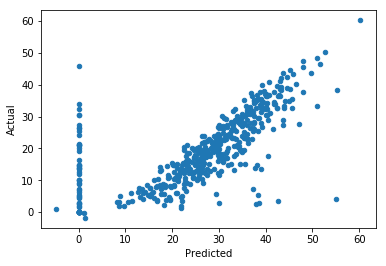

In [402]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

result_no.get_predicted_log_expenditures()

x = result_no.y.sum('i').to_dataframe().squeeze()
xhat = result_no.yhat.sum('i').to_dataframe().squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':x,'Predicted':xhat})

df.plot.scatter(x='Predicted',y='Actual')

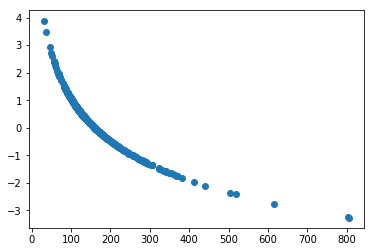

In [403]:
import pylab as pl 

# Turn off variation in household composition
result_no['z'] = result_no['z']*0

# select years and markets you want
l0 = result_no.loglambdas.sel(t=17,m=1)

# Predicted total expenditures given lambda & prices
x0 = result_no.get_predicted_expenditures().sum('i').sel(t=17,m=1)

pl.scatter(x0,l0)
pl.show()

In [404]:
result_no.get_alpha(as_df=True)

i
alcbev           2.731445
bakery           1.222553
beef             1.340057
cereal           1.073745
eggs             0.851550
fresh_fruit      1.342131
fresh_veg        1.361302
milk             0.868345
miscellaneous    1.877475
non_alc_bevs     1.232566
oils             1.029618
othdairy         1.036096
othmeat          0.960911
pork             1.306786
poultry          1.620314
proc_veg         0.724839
procfruit        1.130992
seafood          1.365835
sweets           0.868762
Name: alpha, dtype: float64

In [405]:
result_no.get_beta(as_df=True)

i
alcbev           0.325860
bakery           0.585376
beef             0.249245
cereal           0.484646
eggs             0.337738
fresh_fruit      0.668820
fresh_veg        0.648792
milk             0.400234
miscellaneous    0.641061
non_alc_bevs     0.628499
oils             0.319142
othdairy         0.570271
othmeat          0.487069
pork             0.263726
poultry          0.285556
proc_veg         0.550511
procfruit        0.464571
seafood          0.324584
sweets           0.527864
Name: beta, dtype: float64

In [406]:
result_no.delta.to_dataframe().unstack('k')

delta                                        
k                     M       age child_age log_fsize   vehicle
i                                                              
alcbev         0.150227 -0.002177 -0.076943  0.142174  0.097789
bakery        -0.051377  0.005167 -0.005118  0.392855  0.049719
beef           0.191381  0.005322  0.018020  0.146062  0.071556
cereal        -0.042215 -0.001311 -0.012482  0.390245  0.034395
eggs          -0.042799 -0.003708  0.017175 -0.027634  0.063671
fresh_fruit   -0.055631  0.001553 -0.030673  0.598944 -0.006918
fresh_veg     -0.008470  0.000526  0.000931  0.339908  0.037456
milk           0.060387  0.001077  0.015796  0.352377 -0.040757
miscellaneous  0.065287  0.003457 -0.007489  0.381455  0.105632
non_alc_bevs   0.001281  0.006543 -0.012563  0.244919  0.072674
oils           0.128324 -0.001301 -0.003595  0.033174  0.082033
othdairy       0.025580  0.006533  0.024955  0.338769  0.047251
othmeat        0.112858  0.001720  0.003219  0.158281  0.045191
pork           0.045742 -0.002865  0.017353  0.259775  0.131887
poultry        0.045476 -0.003943  0.034675  0.090157  0.072560
proc_veg      -0.190037  0.002398 -0.041228  0.374619  0.002344
procfruit      0.213698 -0.003880  0.011932 -0.121069  0.083163
seafood       -0.093816  0.006666 -0.054161  0.339111 -0.026974
sweets        -0.005948  0.002622 -0.021817  0.129186  0.042497

## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, from 1975, and focus on
village A as the market we&rsquo;re interested in



In [407]:
result_no

<xarray.Result>
Dimensions:           (i: 19, j: 485, k: 5, kp: 5, m: 1, t: 1)
Coordinates:
  * k                 (k) object 'age' 'M' 'log_fsize' 'vehicle' 'child_age'
  * m                 (m) int64 1
  * t                 (t) int64 17
  * j                 (j) int64 360993 360998 361099 ... 383852 383894 383928
  * i                 (i) object 'alcbev' 'bakery' 'beef' ... 'seafood' 'sweets'
  * kp                (kp) <U9 'M' 'age' 'child_age' 'log_fsize' 'vehicle'
Data variables:
    alpha             (i) float64 2.731 1.223 1.34 1.074 ... 1.131 1.366 0.8688
    beta              (i) float64 0.3259 0.5854 0.2492 ... 0.4646 0.3246 0.5279
    delta             (k, i) float64 -0.002177 0.005167 ... -0.05416 -0.02182
    prices            object None
    characteristics   (k, j, t, m) float64 62.0 45.0 60.0 71.0 ... 0.0 0.0 7.0
    loglambdas        (j, t, m) float64 -1.366 3.891 nan ... 1.876 nan 1.404
    a                 (i, t, m) float64 2.731 1.223 1.34 ... 1.131 1.366 0.8688
    

In [344]:
x = 50 # Budget

p = result_no.prices.sel(t=17,m=1).copy()

p.to_dataframe()

ValueError: dimensions or multi-index levels ['t', 'm'] do not exist

In [258]:
c_no=result_no.demands(x,p_no)
c_no

ValueError: conflicting MultiIndex level name(s):
'i' (dim_0), (i)